In [4]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder

In [5]:
data = pd.read_excel('online_purchase_behavior_dataset.xlsx')
data.head()

,Gender,Age,Nationality,Country,Civil_Status,Children,Annual_Gross_Salary,Internet_hours,Platform,Influencer_follow,Influencer_purchase_recommendation,Devices,Monthly_expense,Purchase_frequency_year,Online_Influenced_purchase,Purchase_Segment,Preferred_shop,More_buying_promoted_sale_days,Buying_target
0,Man,18-35,Spanish,Spain,In a relationship,0,30.000-50.000,3-5,Youtube/Twitch,Yes,No,"Computer, Mobile",1-50,4,0 %,Books,Marketplaces,Yes,Myself
1,Woman,18-35,Spanish,Spain,In a relationship,0,18.000-30.000,5-8,"Instagram, Facebook,TikTok",Yes,Yes,Mobile,1-50,4,1-25 %,Books,Marketplaces,No,Myself
2,Woman,35-50,Spanish,Spain,Married,2,0-18.000,3-5,"Instagram, Facebook,TikTok",Yes,Yes,Mobile,150-300,4,50-75 %,Clothes,Marketplaces,No,Family
3,Man,+50,Spanish,Spain,Married,3,+50.000,3-5,"Instagram, Facebook,TikTok",No,No,Mobile,1-50,12,50-75 %,Other,Store,No,Family
4,Man,35-50,Spanish,Spain,Married,2,18.000-30.000,+8,Youtube/Twitch,No,No,"Computer, Mobile",+300,48,0 %,Electronics,Marketplaces,No,Myself


In [6]:
data.dtypes

Gender                                object
Age                                   object
Nationality                           object
Country                               object
Civil_Status                          object
Children                               int64
Annual_Gross_Salary                   object
Internet_hours                        object
Platform                              object
Influencer_follow                     object
Influencer_purchase_recommendation    object
Devices                               object
Monthly_expense                       object
Purchase_frequency_year                int64
Online_Influenced_purchase            object
Purchase_Segment                      object
Preferred_shop                        object
More_buying_promoted_sale_days        object
Buying_target                         object
dtype: object

In [7]:
data['Annual_Gross_Salary_mean']=data['Annual_Gross_Salary']
data['Annual_Gross_Salary_mean']=data['Annual_Gross_Salary_mean'].replace(('30.000-50.000','0-18.000','18.000-30.000','+50.000'),('40000','9000','24000','50000'))
data['Annual_Gross_Salary_mean'] = data['Annual_Gross_Salary_mean'].astype(int)

data['Internet_hours_mean']=data['Internet_hours']
data['Internet_hours_mean']=data['Internet_hours_mean'].replace(('0-1','1-3','3-5','5-8','+8'),('0.5','2','4','6.5','8'))
data['Internet_hours_mean'] = data['Internet_hours_mean'].astype(float)

data['Age_mean']=data['Age']
data['Age_mean']=data['Age_mean'].replace(('18-35','35-50','+50'),('26.5','42.5','50'))
data['Age_mean'] = data['Age_mean'].astype(float)

data['Monthly_expense_mean']=data['Monthly_expense']
data['Monthly_expense_mean']=data['Monthly_expense_mean'].replace(('0','1-50','50-150','150-300','+300'),('0','25','100','225','300'))
data['Monthly_expense_mean'] = data['Monthly_expense_mean'].astype(int)

data['Online_Influenced_purchase_mean']=data['Online_Influenced_purchase']
data['Online_Influenced_purchase_mean']=data['Online_Influenced_purchase_mean'].replace(('0 %','1-25 %','50-75 %','100 %'),('0','33','66','100'))
data['Online_Influenced_purchase_mean'] = data['Online_Influenced_purchase_mean'].astype(float)

data['Internet_hours']=data['Internet_hours'].replace(('+8'),('8'))

data['Civil_Status']=data['Civil_Status'].replace(('Yesngle'),('Single'))


data.head()

,Gender,Age,Nationality,Country,Civil_Status,Children,Annual_Gross_Salary,Internet_hours,Platform,Influencer_follow,...,Online_Influenced_purchase,Purchase_Segment,Preferred_shop,More_buying_promoted_sale_days,Buying_target,Annual_Gross_Salary_mean,Internet_hours_mean,Age_mean,Monthly_expense_mean,Online_Influenced_purchase_mean
0,Man,18-35,Spanish,Spain,In a relationship,0,30.000-50.000,3-5,Youtube/Twitch,Yes,...,0 %,Books,Marketplaces,Yes,Myself,40000,4.0,26.5,25,0.0
1,Woman,18-35,Spanish,Spain,In a relationship,0,18.000-30.000,5-8,"Instagram, Facebook,TikTok",Yes,...,1-25 %,Books,Marketplaces,No,Myself,24000,6.5,26.5,25,33.0
2,Woman,35-50,Spanish,Spain,Married,2,0-18.000,3-5,"Instagram, Facebook,TikTok",Yes,...,50-75 %,Clothes,Marketplaces,No,Family,9000,4.0,42.5,225,66.0
3,Man,+50,Spanish,Spain,Married,3,+50.000,3-5,"Instagram, Facebook,TikTok",No,...,50-75 %,Other,Store,No,Family,50000,4.0,50.0,25,66.0
4,Man,35-50,Spanish,Spain,Married,2,18.000-30.000,8,Youtube/Twitch,No,...,0 %,Electronics,Marketplaces,No,Myself,24000,8.0,42.5,300,0.0


In [8]:
data['Average_ticket'] = (data['Monthly_expense_mean']*12)/data['Purchase_frequency_year']

In [9]:
data.head()

,Gender,Age,Nationality,Country,Civil_Status,Children,Annual_Gross_Salary,Internet_hours,Platform,Influencer_follow,...,Purchase_Segment,Preferred_shop,More_buying_promoted_sale_days,Buying_target,Annual_Gross_Salary_mean,Internet_hours_mean,Age_mean,Monthly_expense_mean,Online_Influenced_purchase_mean,Average_ticket
0,Man,18-35,Spanish,Spain,In a relationship,0,30.000-50.000,3-5,Youtube/Twitch,Yes,...,Books,Marketplaces,Yes,Myself,40000,4.0,26.5,25,0.0,75.0
1,Woman,18-35,Spanish,Spain,In a relationship,0,18.000-30.000,5-8,"Instagram, Facebook,TikTok",Yes,...,Books,Marketplaces,No,Myself,24000,6.5,26.5,25,33.0,75.0
2,Woman,35-50,Spanish,Spain,Married,2,0-18.000,3-5,"Instagram, Facebook,TikTok",Yes,...,Clothes,Marketplaces,No,Family,9000,4.0,42.5,225,66.0,675.0
3,Man,+50,Spanish,Spain,Married,3,+50.000,3-5,"Instagram, Facebook,TikTok",No,...,Other,Store,No,Family,50000,4.0,50.0,25,66.0,25.0
4,Man,35-50,Spanish,Spain,Married,2,18.000-30.000,8,Youtube/Twitch,No,...,Electronics,Marketplaces,No,Myself,24000,8.0,42.5,300,0.0,75.0


## Statistical hypothesis testing

###Hypothesis nº1

H0: Avg monthly spending of people that pass 5h/day online <= Avg monthly spending of people that pass less than 5h/day online

H1: Avg monthly spending of people that pass 5h/day online > Avg monthly spending of people that pass less than 5h/day online

*H0: \mu_5h+ <= \mu_5h-*

*H1: \mu_5h+ > \mu_5h-*

*\alpha = 5%*

In [10]:
More_5h = data[(data['Internet_hours_mean']== 8.0) | (data['Internet_hours_mean']== 6.5)]
More_5h = More_5h['Monthly_expense_mean']
More_5h

1      25
4     300
6     300
9     300
14    100
16    300
17    100
19    225
23     25
25    300
34    300
45    100
53    300
54    100
59    100
74    100
78    300
Name: Monthly_expense_mean, dtype: int64

In [11]:
Less_5h = data[(data['Internet_hours_mean'] == 0.5) | (data['Internet_hours_mean'] == 2) | (data['Internet_hours_mean']== 4)]
Less_5h = Less_5h['Monthly_expense_mean']
Less_5h

0      25
2     225
3      25
5     300
7     100
     ... 
73    300
75    100
76    100
77    100
79    300
Name: Monthly_expense_mean, Length: 63, dtype: int64

In [12]:
st.ttest_ind(More_5h, Less_5h, equal_var = False, alternative = 'greater')

Ttest_indResult(statistic=1.442228335194273, pvalue=0.08071644438315746)

In [13]:
print(More_5h.mean())
print(Less_5h.mean())

192.64705882352942
148.4126984126984


The pvalue is less than the significance level.

The difference between these values ​​is really small (3%), so it means that the alternative hypothesis is very likely correct but the data is not overwhelming enough to claim that with 95% confident the effect exists.


### Scatter plot - Hypothesis nº1

In [14]:
time_expense = data.groupby(by=['Internet_hours'])['Monthly_expense_mean'].mean()
time_expense = time_expense.to_frame()
time_expense

,Monthly_expense_mean
Internet_hours,
0-1,178.125000
1-3,150.000000
3-5,137.000000
5-8,177.272727
8,220.833333


In [15]:
time_expense.reset_index(inplace=True)
time_expense

,Internet_hours,Monthly_expense_mean
0,0-1,178.125000
1,1-3,150.000000
2,3-5,137.000000
3,5-8,177.272727
4,8,220.833333


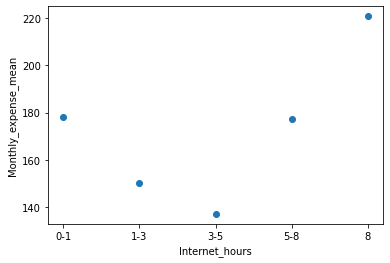

In [16]:
x = time_expense['Internet_hours']
y = time_expense['Monthly_expense_mean']

plt.scatter(x, y)

plt.xlabel('Internet_hours')
plt.ylabel('Monthly_expense_mean')

plt.show()

###Hypothesis nº2

H0: Avg monthly spending of people with extreme behaviour with internet <= Avg monthly spending of people with 'normal/standard' behaviour with internet

H1: Avg monthly spending of people with extreme behaviour with internet > Avg monthly spending of people with 'normal/standard' behaviour with internet

*H0: \mu_1h-&5h+ <= \mu_1-5h*

*H1: \mu_1h-&5h+ > \mu_1-5h*

*\alpha = 5%*

In [17]:
Extreme_behaviour = data[(data['Internet_hours_mean']== 8.0) | (data['Internet_hours_mean']== 0.5)| (data['Internet_hours_mean']== 6.5)]
Extreme_behaviour = Extreme_behaviour['Monthly_expense_mean']
Extreme_behaviour

1      25
4     300
6     300
9     300
14    100
16    300
17    100
19    225
23     25
25    300
33    300
34    300
35    100
45    100
50    225
53    300
54    100
58    100
59    100
60      0
62    100
72    300
74    100
78    300
79    300
Name: Monthly_expense_mean, dtype: int64

In [18]:
Standard_behaviour = data[(data['Internet_hours_mean'] == 4)|(data['Internet_hours_mean'] == 2)]
Standard_behaviour = Standard_behaviour['Monthly_expense_mean']
Standard_behaviour

0      25
2     225
3      25
5     300
7     100
8      25
10     25
11    225
12    300
13    100
15    300
18     25
20     25
21    100
22    300
24    100
26    100
27     25
28    100
29    100
30     25
31    225
32     25
36    225
37    300
38     25
39     25
40     25
41    100
42    300
43    300
44     25
46    225
47    300
48    225
49    100
51    300
52      0
55    100
56    225
57     25
61     25
63    300
64    300
65     25
66     25
67    100
68    100
69    300
70    225
71    300
73    300
75    100
76    100
77    100
Name: Monthly_expense_mean, dtype: int64

In [19]:
st.ttest_ind(Extreme_behaviour, Standard_behaviour, equal_var = False, alternative = 'greater')

Ttest_indResult(statistic=1.6269655454016352, pvalue=0.05522564625678327)

In [20]:
print(Extreme_behaviour.mean())
print(Standard_behaviour.mean())

188.0
144.0909090909091


A statistically significant test result (P ≤ 0.05) means that the test hypothesis is false or should be rejected. 

Therefore, we can claim that with 95% confident the alternative effect exists (extreme behaviours online expenses are higher than medium ones).

###Hypothesis nº3

H0: Avg monthly spending of people with higher salaries <= Avg monthly spending of people with lower salaries

H1: Avg monthly spending of people with higher salaries > Avg monthly spending of people with lower salaries

*H0: \mu_30k+ <= \mu_30k-*

*H1: \mu_30k+ > \mu_30k-*

*\alpha = 5%*

In [21]:
High_salary = data[(data['Annual_Gross_Salary_mean'] > 30000)]
High_salary = High_salary['Monthly_expense_mean']
High_salary

0      25
3      25
6     300
12    300
15    300
19    225
22    300
28    100
32     25
33    300
38     25
42    300
43    300
45    100
47    300
48    225
49    100
51    300
56    225
60      0
63    300
66     25
77    100
79    300
Name: Monthly_expense_mean, dtype: int64

In [22]:
Low_salary = data[(data['Annual_Gross_Salary_mean'] < 30000)]
Low_salary = Low_salary['Monthly_expense_mean']
Low_salary

1      25
2     225
4     300
5     300
7     100
8      25
9     300
10     25
11    225
13    100
14    100
16    300
17    100
18     25
20     25
21    100
23     25
24    100
25    300
26    100
27     25
29    100
30     25
31    225
34    300
35    100
36    225
37    300
39     25
40     25
41    100
44     25
46    225
50    225
52      0
53    300
54    100
55    100
57     25
58    100
59    100
61     25
62    100
64    300
65     25
67    100
68    100
69    300
70    225
71    300
72    300
73    300
74    100
75    100
76    100
78    300
Name: Monthly_expense_mean, dtype: int64

In [23]:
st.ttest_ind(High_salary, Low_salary, equal_var = False, alternative = 'greater')

Ttest_indResult(statistic=1.4744204739994018, pvalue=0.07416576863080478)

In [24]:
print(Extreme_behaviour.mean())
print(Standard_behaviour.mean())

188.0
144.0909090909091


The pvalue is less than the significance level.

The difference between these values ​​is really small (2%), so it means that the alternative hypothesis is very likely correct but the data is not overwhelming enough to claim that with 95% confident the effect exists.

### Scatter plot - Hypothesis nº3

In [25]:
Salary_corr = data.groupby(by=['Annual_Gross_Salary_mean'])['Monthly_expense_mean'].mean()
Salary_corr = Salary_corr.to_frame()
Salary_corr.reset_index(inplace=True)
Salary_corr

,Annual_Gross_Salary_mean,Monthly_expense_mean
0,9000,136.111111
1,24000,153.448276
2,40000,196.875000
3,50000,168.750000


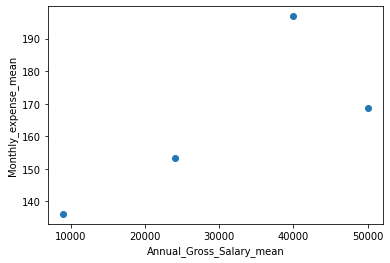

In [26]:
x = Salary_corr['Annual_Gross_Salary_mean']
y = Salary_corr['Monthly_expense_mean']

plt.scatter(x, y)

plt.xlabel('Annual_Gross_Salary_mean')
plt.ylabel('Monthly_expense_mean')

plt.show()

## Correlation non categorical values
Create correlation matrix with all numerical values

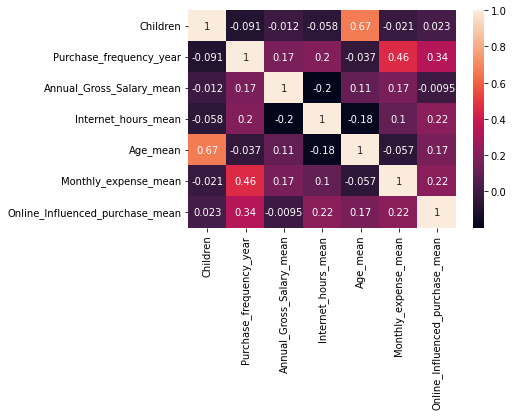

In [27]:
corr_matrix = data[['Children','Purchase_frequency_year','Annual_Gross_Salary_mean','Internet_hours_mean','Age_mean','Monthly_expense_mean','Online_Influenced_purchase_mean']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

###Plotting high value correlations
Age & Children - 0.67

Purchase_frequency_year & Monthly_expense_mean - 0.46

Purchase_frequency_year & Online_Influenced_purchase_mean - 0.34

In [28]:
#Age & Children - 0.67
age_children = data.groupby(by=['Age_mean'])['Children'].mean()
age_children = age_children.to_frame()
age_children.reset_index(inplace=True)
age_children

,Age_mean,Children
0,26.5,0.191489
1,42.5,1.192308
2,50.0,2.142857


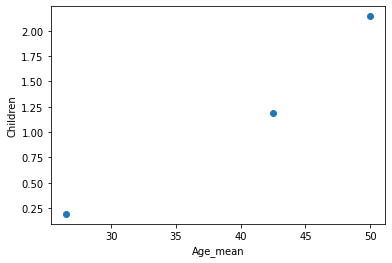

In [29]:
x = age_children['Age_mean']
y = age_children['Children']

plt.scatter(x, y)

plt.xlabel('Age_mean')
plt.ylabel('Children')

plt.show()

In [30]:
#Purchase_frequency_year & Monthly_expense_mean - 0.46
#Purchase_frequency_year & Online_Influenced_purchase_mean - 0.34

Purchase_freq_corr = data.groupby(by=['Purchase_frequency_year'])[['Monthly_expense_mean','Online_Influenced_purchase_mean']].mean()
Purchase_freq_corr.reset_index(inplace=True)
Purchase_freq_corr

,Purchase_frequency_year,Monthly_expense_mean,Online_Influenced_purchase_mean
0,1,0.000000,0.000000
1,2,100.000000,39.800000
2,4,70.454545,21.000000
3,6,143.181818,24.090909
4,12,163.636364,34.000000
5,48,243.055556,47.722222


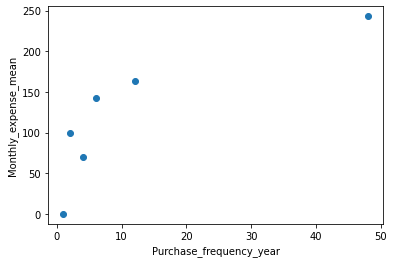

In [31]:
x = Purchase_freq_corr['Purchase_frequency_year']
y = Purchase_freq_corr['Monthly_expense_mean']

plt.scatter(x, y)

plt.xlabel('Purchase_frequency_year')
plt.ylabel('Monthly_expense_mean')

plt.show()

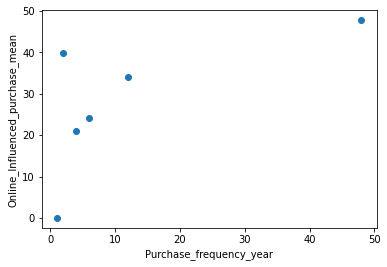

In [32]:
x = Purchase_freq_corr['Purchase_frequency_year']
y = Purchase_freq_corr['Online_Influenced_purchase_mean']

plt.scatter(x, y)

plt.xlabel('Purchase_frequency_year')
plt.ylabel('Online_Influenced_purchase_mean')

plt.show()

In [33]:
data[data['Purchase_frequency_year']==2]

,Gender,Age,Nationality,Country,Civil_Status,Children,Annual_Gross_Salary,Internet_hours,Platform,Influencer_follow,...,Purchase_Segment,Preferred_shop,More_buying_promoted_sale_days,Buying_target,Annual_Gross_Salary_mean,Internet_hours_mean,Age_mean,Monthly_expense_mean,Online_Influenced_purchase_mean,Average_ticket
14,Woman,18-35,Spanish,Spain,In a relationship,0,0-18.000,5-8,General Internet,Yes,...,Other,Store,No,Myself,9000,6.5,26.5,100,33.0,600.0
41,Man,18-35,Spanish,Spain,In a relationship,0,18.000-30.000,3-5,Youtube/Twitch,Yes,...,Electronics,Marketplaces,No,Myself,24000,4.0,26.5,100,0.0,600.0
59,Woman,+50,Spanish,Spain,In a relationship,2,0-18.000,5-8,"Instagram, Facebook,TikTok",Yes,...,Clothes,Marketplaces,No,Myself,9000,6.5,50.0,100,100.0,600.0
75,Woman,35-50,Spanish,Spain,Married,2,18.000-30.000,1-3,General Internet,No,...,Toys,Marketplaces,No,Family,24000,2.0,42.5,100,33.0,600.0
77,Woman,18-35,Spanish,Spain,In a relationship,0,+50.000,1-3,"Instagram, Facebook,TikTok",Yes,...,Pet items,Marketplaces,No,Pets,50000,2.0,26.5,100,33.0,600.0


Checking the effect of Purchase_frequency_year == 2 | 1 (not data enough)

In [34]:
data['Purchase_frequency_year'].value_counts()

12    33
48    18
4     11
6     11
2      5
1      2
Name: Purchase_frequency_year, dtype: int64

In [35]:
data1 = data.drop(data[(data.Purchase_frequency_year == 2)|(data.Purchase_frequency_year == 1)].index)
data1

,Gender,Age,Nationality,Country,Civil_Status,Children,Annual_Gross_Salary,Internet_hours,Platform,Influencer_follow,...,Purchase_Segment,Preferred_shop,More_buying_promoted_sale_days,Buying_target,Annual_Gross_Salary_mean,Internet_hours_mean,Age_mean,Monthly_expense_mean,Online_Influenced_purchase_mean,Average_ticket
0,Man,18-35,Spanish,Spain,In a relationship,0,30.000-50.000,3-5,Youtube/Twitch,Yes,...,Books,Marketplaces,Yes,Myself,40000,4.0,26.5,25,0.0,75.0
1,Woman,18-35,Spanish,Spain,In a relationship,0,18.000-30.000,5-8,"Instagram, Facebook,TikTok",Yes,...,Books,Marketplaces,No,Myself,24000,6.5,26.5,25,33.0,75.0
2,Woman,35-50,Spanish,Spain,Married,2,0-18.000,3-5,"Instagram, Facebook,TikTok",Yes,...,Clothes,Marketplaces,No,Family,9000,4.0,42.5,225,66.0,675.0
3,Man,+50,Spanish,Spain,Married,3,+50.000,3-5,"Instagram, Facebook,TikTok",No,...,Other,Store,No,Family,50000,4.0,50.0,25,66.0,25.0
4,Man,35-50,Spanish,Spain,Married,2,18.000-30.000,8,Youtube/Twitch,No,...,Electronics,Marketplaces,No,Myself,24000,8.0,42.5,300,0.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Woman,18-35,Spanish,Spain,Single,0,18.000-30.000,3-5,General Internet,Yes,...,Clothes,Store,Yes,Myself,24000,4.0,26.5,300,33.0,75.0
74,Woman,35-50,Spanish,Spain,Married,2,0-18.000,5-8,General Internet,Yes,...,Clothes,Store,No,Family,9000,6.5,42.5,100,33.0,100.0
76,Man,35-50,Spanish,Spain,Married,2,18.000-30.000,1-3,"Instagram, Facebook,TikTok",No,...,Clothes,Store,Yes,Family,24000,2.0,42.5,100,33.0,100.0
78,Woman,18-35,Spanish,Spain,In a relationship,1,18.000-30.000,8,"Instagram, Facebook,TikTok",Yes,...,Clothes,Marketplaces,Yes,Myself,24000,8.0,26.5,300,66.0,75.0


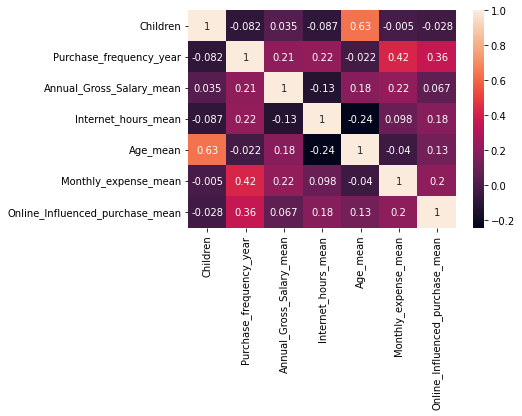

In [37]:
corr_matrix = data1[['Children','Purchase_frequency_year','Annual_Gross_Salary_mean','Internet_hours_mean','Age_mean','Monthly_expense_mean','Online_Influenced_purchase_mean']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

After dropping segments with non enough data, correlation values do not change significantly

##Demography data per average ticket expense


In [38]:
data['Average_ticket'].describe()

count     80.000000
mean     187.109375
std      186.827231
min        0.000000
25%       56.250000
50%      100.000000
75%      300.000000
max      675.000000
Name: Average_ticket, dtype: float64

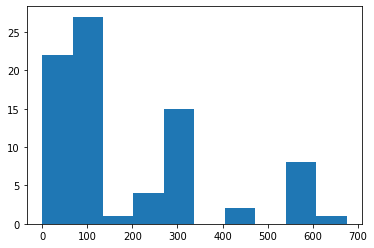

In [39]:
plt.hist(data.Average_ticket)
plt.show()

In [40]:
data['Average_ticket']

0      75.0
1      75.0
2     675.0
3      25.0
4      75.0
      ...  
75    600.0
76    100.0
77    600.0
78     75.0
79     75.0
Name: Average_ticket, Length: 80, dtype: float64

In [41]:
#Create dummies

data_dummies = data

gender = pd.get_dummies(data_dummies['Gender'])
data_dummies = data_dummies.drop('Gender',axis = 1)
data_dummies = data_dummies.join(gender)

civil_status = pd.get_dummies(data_dummies['Civil_Status'])
data_dummies = data_dummies.drop('Civil_Status',axis = 1)
data_dummies = data_dummies.join(civil_status)

platform = pd.get_dummies(data_dummies['Platform'])
data_dummies = data_dummies.drop('Platform',axis = 1)
data_dummies = data_dummies.join(platform)

influencer_follow = pd.get_dummies(data_dummies['Influencer_follow'], prefix='Influencer_follow')
data_dummies = data_dummies.drop('Influencer_follow',axis = 1)
data_dummies = data_dummies.join(influencer_follow)

Influencer_purchase = pd.get_dummies(data_dummies['Influencer_purchase_recommendation'], prefix='Influencer_purchase_rec')
data_dummies = data_dummies.drop('Influencer_purchase_recommendation',axis = 1)
data_dummies = data_dummies.join(Influencer_purchase)

device = pd.get_dummies(data_dummies['Devices'])
data_dummies = data_dummies.drop('Devices',axis = 1)
data_dummies = data_dummies.join(device)

purchase_Segment = pd.get_dummies(data_dummies['Purchase_Segment'])
data_dummies = data_dummies.drop('Purchase_Segment',axis = 1)
data_dummies = data_dummies.merge(purchase_Segment)

preferred_shop = pd.get_dummies(data_dummies['Preferred_shop'])
data_dummies = data_dummies.drop('Preferred_shop',axis = 1)
data_dummies = data_dummies.join(preferred_shop)

sale_days = pd.get_dummies(data_dummies['More_buying_promoted_sale_days'], prefix='sale_days')
data_dummies = data_dummies.drop('More_buying_promoted_sale_days',axis = 1)
data_dummies = data_dummies.join(sale_days)

buying_target = pd.get_dummies(data_dummies['Buying_target'])
data_dummies = data_dummies.drop('Buying_target',axis = 1)
data_dummies = data_dummies.join(buying_target)

pd.set_option('display.max_columns', None)

#pd.reset_option(“max_columns”)

data_dummies = data_dummies.drop(['Age','Nationality','Country','Annual_Gross_Salary','Internet_hours','Monthly_expense','Online_Influenced_purchase'],axis = 1)
data_dummies 

,Children,Purchase_frequency_year,Annual_Gross_Salary_mean,Internet_hours_mean,Age_mean,Monthly_expense_mean,Online_Influenced_purchase_mean,Average_ticket,Man,Woman,In a relationship,Married,Single,General Internet,"Instagram, Facebook,TikTok",Other,Reddit,Twitter,Youtube/Twitch,Influencer_follow_No,Influencer_follow_Yes,Influencer_purchase_rec_No,Influencer_purchase_rec_Yes,Computer,"Computer, Mobile","Computer, Mobile, Tablet",Mobile,"Mobile, Tablet",Tablet,Books,Clothes,Decoration,Electronics,Food,Pet items,Sport,Toys,Video games,Marketplaces,Store,sale_days_No,sale_days_Yes,Couple,Family,Myself,Pets
0,0,4,40000,4.0,26.5,25,0.0,75.0,1,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
1,0,4,40000,4.0,26.5,25,0.0,75.0,1,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
2,0,4,40000,4.0,26.5,25,0.0,75.0,1,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
3,0,4,40000,4.0,26.5,25,0.0,75.0,1,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0
4,0,4,40000,4.0,26.5,25,0.0,75.0,1,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5223,0,48,50000,0.5,42.5,300,100.0,75.0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
5224,0,48,50000,0.5,42.5,300,100.0,75.0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
5225,0,48,50000,0.5,42.5,300,100.0,75.0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
5226,0,48,50000,0.5,42.5,300,100.0,75.0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0


In [80]:
#Small ticket 0-100
small_ticket = data_dummies[(data_dummies['Average_ticket']<=100)]

#Medium ticket 100-350
medium_ticket = data_dummies[(data_dummies['Average_ticket']>100) & (data_dummies['Average_ticket']<=350)]

#High ticket 350-675
high_ticket = data_dummies[(data_dummies['Average_ticket']>350) & (data_dummies['Average_ticket']<=675)]


###Small Average ticket persona

In [81]:
sum = {}
mean = {}
column_list = ['Man','Woman','In a relationship','Married','Single','General Internet','Instagram, Facebook,TikTok','Reddit','Twitter','Youtube/Twitch','Influencer_follow_Yes','Influencer_follow_No','Influencer_purchase_rec_No','Influencer_purchase_rec_Yes','Computer, Mobile','Computer','Mobile','Mobile','Books','Clothes','Decoration','Electronics','Food','Pet items','Sport','Toys','Video games','Marketplaces','Store','sale_days_No','sale_days_Yes','Couple','Family','Myself','Pets']
column_list_2 = ['Children','Purchase_frequency_year','Annual_Gross_Salary_mean','Internet_hours_mean','Age_mean','Monthly_expense_mean','Online_Influenced_purchase_mean','Average_ticket']
for column in column_list:
    a= small_ticket[column].sum()
    sum[column] = a

for column in column_list_2:
    a= small_ticket[column].mean()
    mean[column] = a


In [82]:
sum_df = pd.DataFrame(sum.items())
sum_df = sum_df.rename(columns={0: 'Attribute', 1: 'count'})

sum_df

,Attribute,count
0,Man,1334
1,Woman,1848
2,In a relationship,1004
3,Married,1188
4,Single,990
5,General Internet,660
6,"Instagram, Facebook,TikTok",1716
7,Reddit,0
8,Twitter,396
9,Youtube/Twitch,396


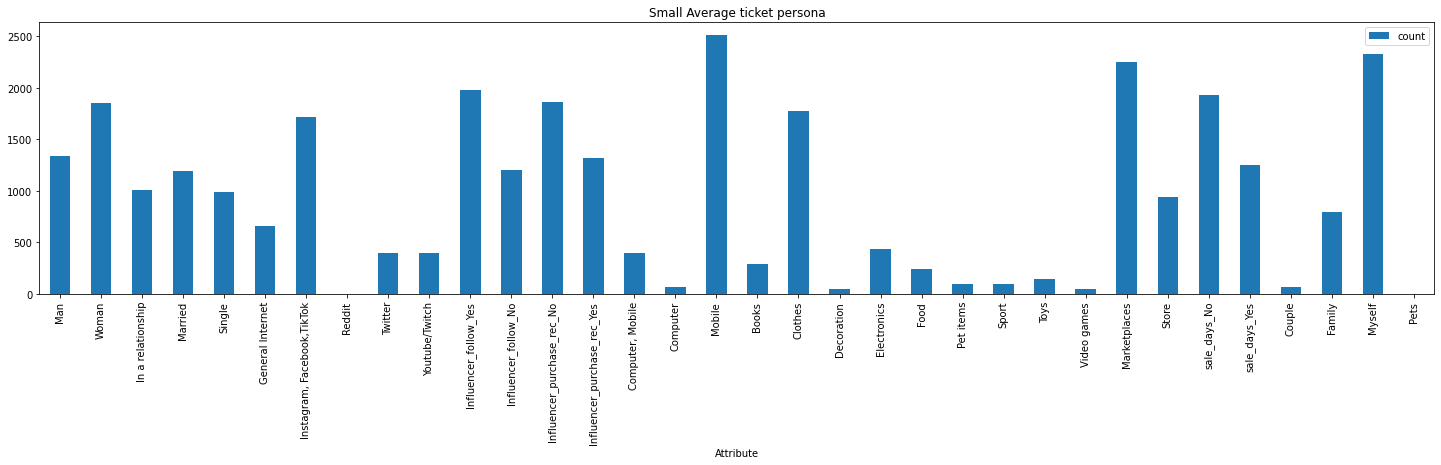

In [83]:
plt.rcParams["figure.figsize"] = (25,5)

ax = sum_df.plot(x="Attribute", y="count", kind="bar", rot=90)

ax.set_title('Small Average ticket persona')

plt.show()

In [84]:
mean_df = pd.DataFrame(mean.items())
mean_df = mean_df.rename(columns={0: 'Attribute', 1: 'mean'})

mean_df

,Attribute,mean
0,Children,0.642992
1,Purchase_frequency_year,22.778127
2,Annual_Gross_Salary_mean,24944.060339
3,Internet_hours_mean,3.766813
4,Age_mean,33.498114
5,Monthly_expense_mean,116.436204
6,Online_Influenced_purchase_mean,34.663734
7,Average_ticket,60.869736


###Medium Average ticket persona

In [85]:
sum = {}
mean = {}
column_list = ['Man','Woman','In a relationship','Married','Single','General Internet','Instagram, Facebook,TikTok','Reddit','Twitter','Youtube/Twitch','Influencer_follow_Yes','Influencer_follow_No','Influencer_purchase_rec_No','Influencer_purchase_rec_Yes','Computer, Mobile','Computer','Mobile','Mobile','Books','Clothes','Decoration','Electronics','Food','Pet items','Sport','Toys','Video games','Marketplaces','Store','sale_days_No','sale_days_Yes','Couple','Family','Myself','Pets']
column_list_2 = ['Children','Purchase_frequency_year','Annual_Gross_Salary_mean','Internet_hours_mean','Age_mean','Monthly_expense_mean','Online_Influenced_purchase_mean','Average_ticket']
for column in column_list:
    a= medium_ticket[column].sum()
    sum[column] = a

for column in column_list_2:
    a= medium_ticket[column].mean()
    mean[column] = a


In [86]:
sum_df = pd.DataFrame(sum.items())
sum_df = sum_df.rename(columns={0: 'Attribute', 1: 'count'})

sum_df

,Attribute,count
0,Man,528
1,Woman,792
2,In a relationship,396
3,Married,660
4,Single,264
5,General Internet,396
6,"Instagram, Facebook,TikTok",594
7,Reddit,66
8,Twitter,0
9,Youtube/Twitch,264


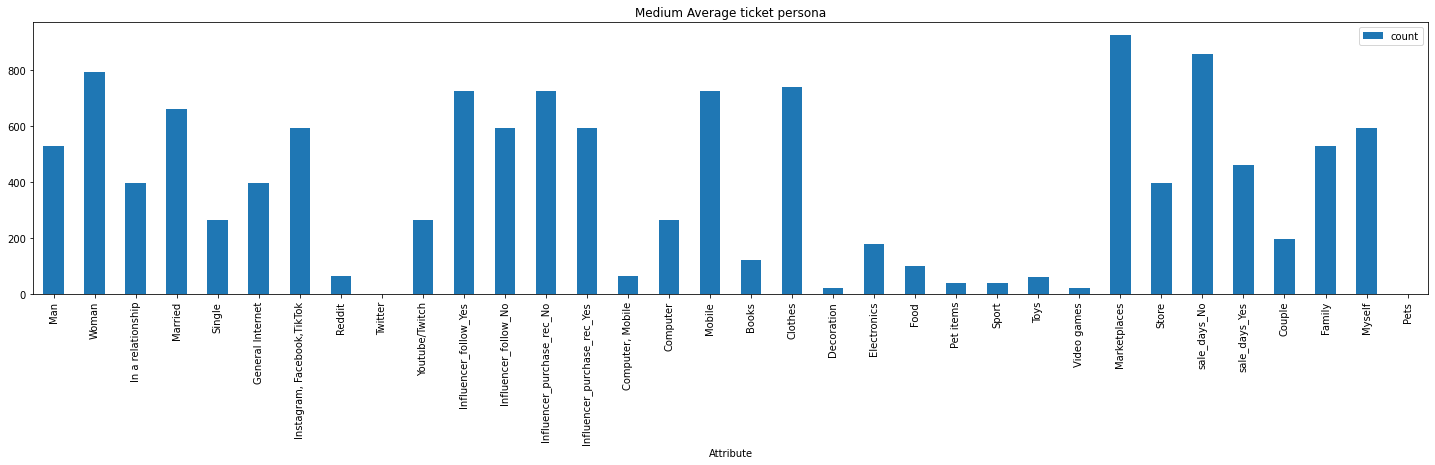

In [87]:
plt.rcParams["figure.figsize"] = (25,5)

ax = sum_df.plot(x="Attribute", y="count", kind="bar", rot=90)

ax.set_title('Medium Average ticket persona')

plt.show()

In [88]:
mean_df = pd.DataFrame(mean.items())
mean_df = mean_df.rename(columns={0: 'Attribute', 1: 'mean'})

mean_df

,Attribute,mean
0,Children,0.85
1,Purchase_frequency_year,10.10
2,Annual_Gross_Salary_mean,22200.00
3,Internet_hours_mean,3.05
4,Age_mean,33.65
5,Monthly_expense_mean,235.00
6,Online_Influenced_purchase_mean,26.40
7,Average_ticket,280.00


###High Average ticket persona

In [89]:
sum = {}
mean = {}
column_list = ['Man','Woman','In a relationship','Married','Single','General Internet','Instagram, Facebook,TikTok','Reddit','Twitter','Youtube/Twitch','Influencer_follow_Yes','Influencer_follow_No','Influencer_purchase_rec_No','Influencer_purchase_rec_Yes','Computer, Mobile','Computer','Mobile','Mobile','Books','Clothes','Decoration','Electronics','Food','Pet items','Sport','Toys','Video games','Marketplaces','Store','sale_days_No','sale_days_Yes','Couple','Family','Myself','Pets']
column_list_2 = ['Children','Purchase_frequency_year','Annual_Gross_Salary_mean','Internet_hours_mean','Age_mean','Monthly_expense_mean','Online_Influenced_purchase_mean','Average_ticket']
for column in column_list:
    a= high_ticket[column].sum()
    sum[column] = a

for column in column_list_2:
    a= high_ticket[column].mean()
    mean[column] = a


In [90]:
sum_df = pd.DataFrame(sum.items())
sum_df = sum_df.rename(columns={0: 'Attribute', 1: 'count'})

sum_df

,Attribute,count
0,Man,330
1,Woman,396
2,In a relationship,396
3,Married,264
4,Single,66
5,General Internet,264
6,"Instagram, Facebook,TikTok",330
7,Reddit,0
8,Twitter,0
9,Youtube/Twitch,132


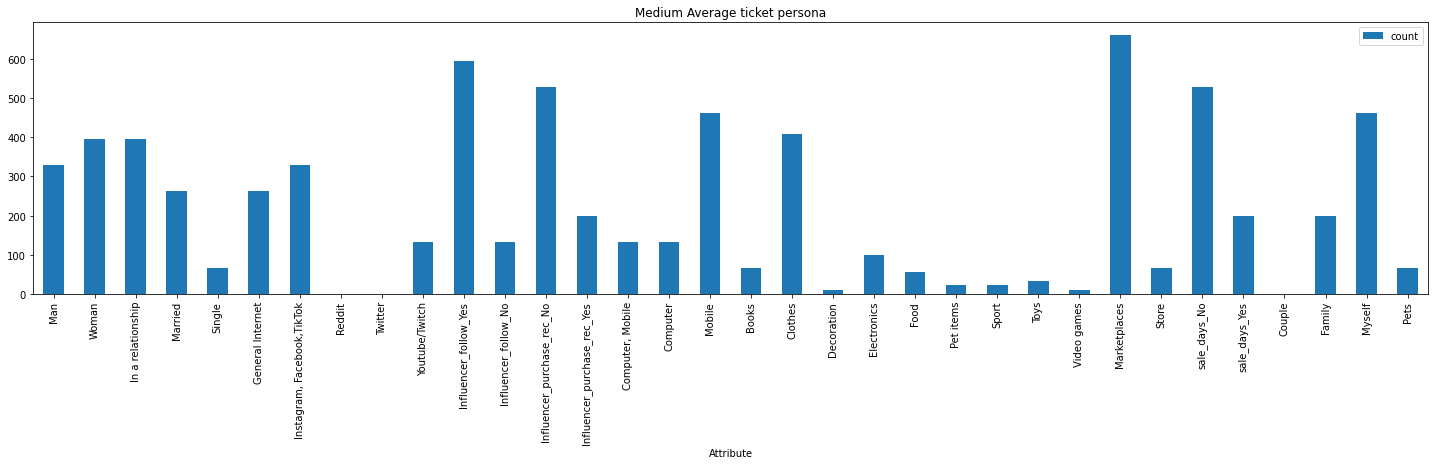

In [91]:
plt.rcParams["figure.figsize"] = (25,5)

ax = sum_df.plot(x="Attribute", y="count", kind="bar", rot=90)

ax.set_title('Medium Average ticket persona')

plt.show()

In [92]:
mean_df = pd.DataFrame(mean.items())
mean_df = mean_df.rename(columns={0: 'Attribute', 1: 'mean'})

mean_df

,Attribute,mean
0,Children,0.636364
1,Purchase_frequency_year,4.000000
2,Annual_Gross_Salary_mean,26636.363636
3,Internet_hours_mean,3.681818
4,Age_mean,34.454545
5,Monthly_expense_mean,188.636364
6,Online_Influenced_purchase_mean,36.181818
7,Average_ticket,579.545455


##Correlation non categorical & categorical data

In [55]:
data_dummies.corr()

,Children,Purchase_frequency_year,Annual_Gross_Salary_mean,Internet_hours_mean,Age_mean,Monthly_expense_mean,Online_Influenced_purchase_mean,Average_ticket,Man,Woman,In a relationship,Married,Single,General Internet,"Instagram, Facebook,TikTok",Other,Reddit,Twitter,Youtube/Twitch,Influencer_follow_No,Influencer_follow_Yes,Influencer_purchase_rec_No,Influencer_purchase_rec_Yes,Computer,"Computer, Mobile","Computer, Mobile, Tablet",Mobile,"Mobile, Tablet",Tablet,Books,Clothes,Decoration,Electronics,Food,Pet items,Sport,Toys,Video games,Marketplaces,Store,sale_days_No,sale_days_Yes,Couple,Family,Myself,Pets
Children,1.000000,-0.079226,0.001219,-0.069465,0.682798,-0.012112,0.044201,0.050914,-0.191051,0.191051,-0.306313,0.483841,-0.211660,0.034215,0.219694,-0.038053,-0.083038,-0.159769,-0.198575,0.185886,-0.185886,-0.048467,0.048467,-0.040474,-0.010478,0.204036,-0.025901,0.052030,-0.124473,0.000623,0.002221,0.000244,0.000782,0.000564,0.000348,0.000348,0.000430,0.000244,-0.158958,0.158958,0.114631,-0.114631,0.013576,0.500940,-0.462488,-0.083038
Purchase_frequency_year,-0.079226,1.000000,0.143529,0.228050,-0.056081,0.448327,0.305704,-0.422569,-0.124431,0.124431,-0.029527,-0.098403,0.143421,-0.024979,0.196445,0.096064,-0.033570,-0.142002,-0.142276,0.038252,-0.038252,-0.170581,0.170581,-0.097750,0.007785,-0.082610,0.125462,-0.047782,-0.051986,-0.001572,-0.005606,-0.000617,-0.001975,-0.001423,-0.000879,-0.000879,-0.001085,-0.000617,0.127362,-0.127362,-0.190830,0.190830,-0.116689,-0.164985,0.233725,-0.101125
Annual_Gross_Salary_mean,0.001219,0.143529,1.000000,-0.178911,0.092630,0.148539,-0.060996,-0.013587,0.322024,-0.322024,0.100910,-0.062685,-0.039504,0.274848,-0.316134,0.095985,0.209454,0.104207,-0.048150,0.230454,-0.230454,0.240133,-0.240133,-0.023908,-0.047297,-0.007004,0.072033,0.000161,-0.058747,-0.001571,-0.005601,-0.000616,-0.001973,-0.001422,-0.000878,-0.000878,-0.001084,-0.000616,0.150684,-0.150684,-0.146309,0.146309,-0.133714,-0.062964,0.072117,0.209454
Internet_hours_mean,-0.069465,0.228050,-0.178911,1.000000,-0.170968,0.121036,0.267274,-0.023138,-0.127375,0.127375,-0.020621,-0.191848,0.239231,-0.211388,0.059789,-0.074852,0.022634,0.012463,0.167311,0.002474,-0.002474,-0.122483,0.122483,0.010071,0.277293,-0.084595,-0.184365,0.051123,0.007197,0.001225,0.004368,0.000480,0.001539,0.001109,0.000685,0.000685,0.000845,0.000480,-0.010629,0.010629,-0.090551,0.090551,-0.075752,-0.192145,0.236680,-0.083635
Age_mean,0.682798,-0.056081,0.092630,-0.170968,1.000000,-0.070373,0.145683,0.028338,-0.104314,0.104314,-0.216093,0.417362,-0.235193,0.075625,0.088780,0.051520,-0.091273,0.026776,-0.214207,0.326902,-0.326902,0.133007,-0.133007,-0.015950,-0.074008,0.078126,0.112486,-0.129912,-0.107537,-0.000843,-0.003006,-0.000331,-0.001059,-0.000763,-0.000471,-0.000471,-0.000582,-0.000331,-0.005837,0.005837,0.213645,-0.213645,0.174114,0.355735,-0.396221,-0.091273
Monthly_expense_mean,-0.012112,0.448327,0.148539,0.121036,-0.070373,1.000000,0.191664,0.359191,-0.046842,0.046842,0.001824,0.016090,-0.020167,0.089768,0.026763,0.066238,0.144542,-0.302991,0.022951,-0.018654,0.018654,-0.176402,0.176402,0.002064,-0.020391,-0.026018,-0.057602,0.205732,0.029100,-0.001084,-0.003865,-0.000425,-0.001362,-0.000981,-0.000606,-0.000606,-0.000748,-0.000425,0.197673,-0.197673,-0.189991,0.189991,0.051017,-0.036432,0.024483,-0.056767
Online_Influenced_purchase_mean,0.044201,0.305704,-0.060996,0.267274,0.145683,0.191664,1.000000,-0.014189,-0.362300,0.362300,0.097198,-0.133883,0.044971,-0.073378,0.252346,0.144739,0.000996,0.002521,-0.286021,-0.157237,0.157237,-0.396441,0.396441,-0.241253,-0.049750,0.001747,0.205026,0.001418,-0.058333,-0.002368,-0.008446,-0.000929,-0.002976,-0.002144,-0.001324,-0.001324,-0.001634,-0.000929,0.016934,-0.016934,0.029246,-0.029246,-0.077037,-0.070649,0.102138,0.000996
Average_ticket,0.050914,-0.422569,-0.013587,-0.023138,0.028338,0.359191,-0.014189,1.000000,-0.025472,0.025472,0.138305,0.042557,-0.199250,0.138167,-0.079344,-0.031503,0.067864,-0.20

In [56]:

# Create correlation matrix
corr_mat = data_dummies.corr(method='pearson')

# Convert correlation matrix to 1-D Series and sort
sorted_mat = corr_mat.unstack().sort_values()

pd.set_option('display.max_rows', None)

#pd.reset_option(“max_rows”)

print(sorted_mat)

Influencer_purchase_rec_Yes      Influencer_purchase_rec_No        -1.000000
Influencer_purchase_rec_No       Influencer_purchase_rec_Yes       -1.000000
Man                              Woman                             -1.000000
Store                            Marketplaces                      -1.000000
Marketplaces                     Store                             -1.000000
Woman                            Man                               -1.000000
sale_days_Yes                    sale_days_No                      -1.000000
sale_days_No                     sale_days_Yes                     -1.000000
Influencer_follow_No             Influencer_follow_Yes             -1.000000
Influencer_follow_Yes            Influencer_follow_No              -1.000000
Myself                           Family                            -0.865080
Family                           Myself                            -0.865080
In a relationship                Married                           -0.595563

In [57]:
sorted_mat = sorted_mat.to_frame()
sorted_mat.reset_index(inplace=True)
sorted_mat.rename(columns = {0:'Correlation'}, inplace = True)
sorted_mat

,level_0,level_1,Correlation
0,Influencer_purchase_rec_Yes,Influencer_purchase_rec_No,-1.000000
1,Influencer_purchase_rec_No,Influencer_purchase_rec_Yes,-1.000000
2,Man,Woman,-1.000000
3,Store,Marketplaces,-1.000000
4,Marketplaces,Store,-1.000000
5,Woman,Man,-1.000000
6,sale_days_Yes,sale_days_No,-1.000000
7,sale_days_No,sale_days_Yes,-1.000000
8,Influencer_follow_No,Influencer_follow_Yes,-1.000000
9,Influencer_follow_Yes,Influencer_follow_No,-1.000000


In [58]:
sorted_mat = sorted_mat[(sorted_mat.Correlation != 1)]
sorted_mat = sorted_mat[(sorted_mat['Correlation'] > -0.9)]
high_corr = sorted_mat[(sorted_mat['Correlation']>0.30) | (sorted_mat['Correlation']<-0.30)]
high_corr = high_corr.drop_duplicates(subset='Correlation', keep="last")
high_corr

,level_0,level_1,Correlation
11,Family,Myself,-0.865080
13,Married,In a relationship,-0.595563
15,"Instagram, Facebook,TikTok",General Internet,-0.586988
17,Influencer_purchase_rec_No,Influencer_follow_Yes,-0.575957
19,Influencer_purchase_rec_Yes,Influencer_follow_No,-0.575957
21,Mobile,"Computer, Mobile",-0.556099
23,"Instagram, Facebook,TikTok",Man,-0.500004
25,Man,Influencer_purchase_rec_Yes,-0.490992
27,Woman,Influencer_purchase_rec_No,-0.490992
29,Mobile,Computer,-0.483594


###Some interesting correlation values:

Woman - Instagram, Facebook, TikTok (0.50)

Woman - Influencer_purchase_rec_Yes (0.49)

Monthly_expense_mean - Purchase_frequency_year (0.44)

Influencer_purchase_rec_Yes - Online_Influenced_purchase_mean (0.39)

Woman - Online_Influenced_purchase_mean (0.36)

Man - Youtube/Twitch (0.35)

Man - Annual_Gross_Salary_mean (0.32)

Woman - Mobile (0.31)

Online_Influenced_purchase_mean - Purchase_frequency_year (0.30)

Influencer_follow_Yes - Married (-0.33)

#Statistics for a Jewelry Business
After working on the Exploratory Data Analysis and some Hypothesis, we are going to use this information for a practical case: **Creating an online business of selling Jewelry**.

##Buyer Persona Profiles

**Sources:** 

*Who Buys On Etsy? Audience & Demographics (Statistics)*

https://techpenny.com/typical-etsy-demographics-stats/#:~:text=Etsy's%20target%20market%20and%20audience%20are%20young%20women%20with%20money,to%20gear%20toward%20this%20market.

*Target Market For Jewelry Business – Finding Your Customers*

https://440industries.com/target-market-for-jewelry-business-finding-your-customers/


##Buyer Persona Profile nº1

Women

Age: 18-35

Salary: >30.000 €/y

Single

Children: 0

Buying target: Her self

In [106]:
pd.reset_option('display.max_rows')

In [93]:
buyer_persona1 = data_dummies
buyer_persona1 = buyer_persona1[buyer_persona1['Woman']==1]
buyer_persona1 = buyer_persona1[buyer_persona1['Children']==0]
buyer_persona1 = buyer_persona1[buyer_persona1['Annual_Gross_Salary_mean']>30000]
buyer_persona1 = buyer_persona1[buyer_persona1['Single']==1]
buyer_persona1 = buyer_persona1[(buyer_persona1['Age_mean']>18) & (buyer_persona1['Age_mean']<35)]
buyer_persona1 = buyer_persona1[buyer_persona1['Myself']==1]

buyer_persona1

,Children,Purchase_frequency_year,Annual_Gross_Salary_mean,Internet_hours_mean,Age_mean,Monthly_expense_mean,Online_Influenced_purchase_mean,Average_ticket,Man,Woman,In a relationship,Married,Single,General Internet,"Instagram, Facebook,TikTok",Other,Reddit,Twitter,Youtube/Twitch,Influencer_follow_No,Influencer_follow_Yes,Influencer_purchase_rec_No,Influencer_purchase_rec_Yes,Computer,"Computer, Mobile","Computer, Mobile, Tablet",Mobile,"Mobile, Tablet",Tablet,Books,Clothes,Decoration,Electronics,Food,Pet items,Sport,Toys,Video games,Marketplaces,Store,sale_days_No,sale_days_Yes,Couple,Family,Myself,Pets
1254,0,48,40000,6.5,26.5,225,33.0,56.25,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
1255,0,48,40000,6.5,26.5,225,33.0,56.25,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
1256,0,48,40000,6.5,26.5,225,33.0,56.25,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
1257,0,48,40000,6.5,26.5,225,33.0,56.25,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0
1258,0,48,40000,6.5,26.5,225,33.0,56.25,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,0,48,40000,6.5,26.5,225,33.0,56.25,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0
1316,0,48,40000,6.5,26.5,225,33.0,56.25,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
1317,0,48,40000,6.5,26.5,225,33.0,56.25,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
1318,0,48,40000,6.5,26.5,225,33.0,56.25,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0


In [94]:
sum = {}
mean = {}
column_list = ['Man','Woman','In a relationship','Married','Single','General Internet','Instagram, Facebook,TikTok','Reddit','Twitter','Youtube/Twitch','Influencer_follow_Yes','Influencer_follow_No','Influencer_purchase_rec_No','Influencer_purchase_rec_Yes','Computer, Mobile','Computer','Mobile','Mobile','Books','Clothes','Decoration','Electronics','Food','Pet items','Sport','Toys','Video games','Marketplaces','Store','sale_days_No','sale_days_Yes','Couple','Family','Myself','Pets']
column_list_2 = ['Children','Purchase_frequency_year','Annual_Gross_Salary_mean','Internet_hours_mean','Age_mean','Monthly_expense_mean','Online_Influenced_purchase_mean','Average_ticket']
for column in column_list:
    a= buyer_persona1[column].sum()
    sum[column] = a

for column in column_list_2:
    a= buyer_persona1[column].mean()
    mean[column] = a


In [95]:
sum_df = pd.DataFrame(sum.items())
sum_df = sum_df.rename(columns={0: 'Attribute', 1: 'count'})

sum_df

,Attribute,count
0,Man,0
1,Woman,66
2,In a relationship,0
3,Married,0
4,Single,66
5,General Internet,0
6,"Instagram, Facebook,TikTok",66
7,Reddit,0
8,Twitter,0
9,Youtube/Twitch,0


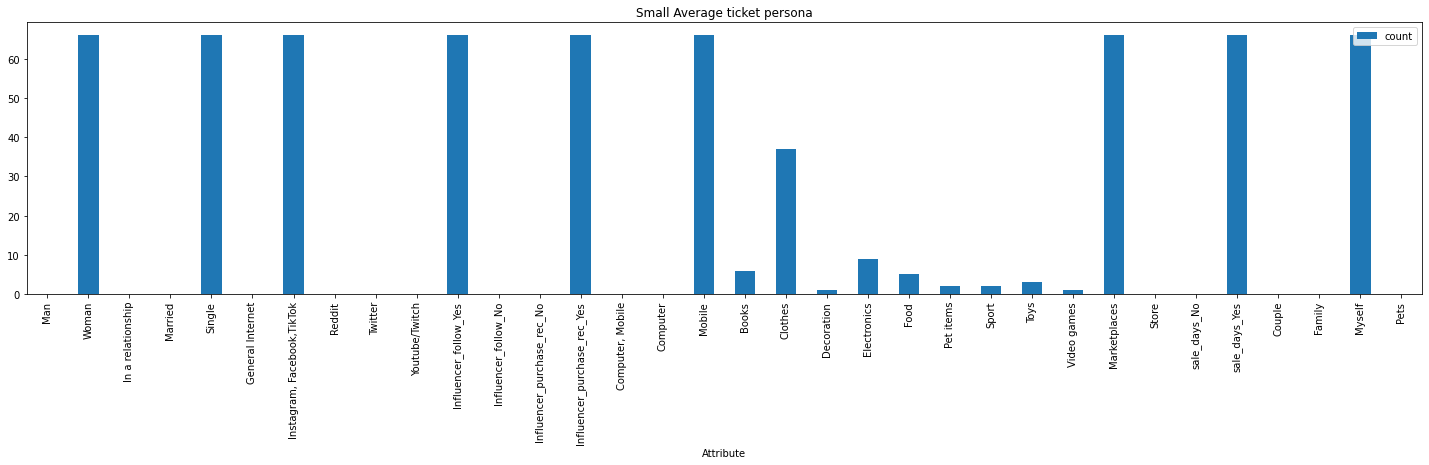

In [96]:
plt.rcParams["figure.figsize"] = (25,5)

ax = sum_df.plot(x="Attribute", y="count", kind="bar", rot=90)

ax.set_title('Small Average ticket persona')

plt.show()

In [97]:
mean_df = pd.DataFrame(mean.items())
mean_df = mean_df.rename(columns={0: 'Attribute', 1: 'mean'})

mean_df

,Attribute,mean
0,Children,0.00
1,Purchase_frequency_year,48.00
2,Annual_Gross_Salary_mean,40000.00
3,Internet_hours_mean,6.50
4,Age_mean,26.50
5,Monthly_expense_mean,225.00
6,Online_Influenced_purchase_mean,33.00
7,Average_ticket,56.25


##Buyer Persona Profile nº2

Women

Age: 18-35

Salary: <30.000 €/y

In a relationship

Children: 0

Buying target: Her self

In [98]:
buyer_persona2 = data_dummies
buyer_persona2 = buyer_persona2[buyer_persona2['Woman']==1]
buyer_persona2 = buyer_persona2[buyer_persona2['Children']==0]
buyer_persona2 = buyer_persona2[buyer_persona2['Annual_Gross_Salary_mean']<30000]
buyer_persona2 = buyer_persona2[buyer_persona2['In a relationship']==1]
buyer_persona2 = buyer_persona2[(buyer_persona2['Age_mean']>18) & (buyer_persona2['Age_mean']<35)]
buyer_persona2 = buyer_persona2[buyer_persona2['Myself']==1]

buyer_persona2

,Children,Purchase_frequency_year,Annual_Gross_Salary_mean,Internet_hours_mean,Age_mean,Monthly_expense_mean,Online_Influenced_purchase_mean,Average_ticket,Man,Woman,In a relationship,Married,Single,General Internet,"Instagram, Facebook,TikTok",Other,Reddit,Twitter,Youtube/Twitch,Influencer_follow_No,Influencer_follow_Yes,Influencer_purchase_rec_No,Influencer_purchase_rec_Yes,Computer,"Computer, Mobile","Computer, Mobile, Tablet",Mobile,"Mobile, Tablet",Tablet,Books,Clothes,Decoration,Electronics,Food,Pet items,Sport,Toys,Video games,Marketplaces,Store,sale_days_No,sale_days_Yes,Couple,Family,Myself,Pets
66,0,4,24000,6.5,26.5,25,33.0,75.0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
67,0,4,24000,6.5,26.5,25,33.0,75.0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
68,0,4,24000,6.5,26.5,25,33.0,75.0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
69,0,4,24000,6.5,26.5,25,33.0,75.0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0
70,0,4,24000,6.5,26.5,25,33.0,75.0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4549,0,48,9000,2.0,26.5,100,33.0,25.0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0
4550,0,48,9000,2.0,26.5,100,33.0,25.0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
4551,0,48,9000,2.0,26.5,100,33.0,25.0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
4552,0,48,9000,2.0,26.5,100,33.0,25.0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0


In [102]:
sum = {}
mean = {}
column_list = ['Man','Woman','In a relationship','Married','Single','General Internet','Instagram, Facebook,TikTok','Reddit','Twitter','Youtube/Twitch','Influencer_follow_Yes','Influencer_follow_No','Influencer_purchase_rec_No','Influencer_purchase_rec_Yes','Computer, Mobile','Computer','Mobile','Mobile','Books','Clothes','Decoration','Electronics','Food','Pet items','Sport','Toys','Video games','Marketplaces','Store','sale_days_No','sale_days_Yes','Couple','Family','Myself','Pets']
column_list_2 = ['Children','Purchase_frequency_year','Annual_Gross_Salary_mean','Internet_hours_mean','Age_mean','Monthly_expense_mean','Online_Influenced_purchase_mean','Average_ticket']
for column in column_list:
    a= buyer_persona2[column].sum()
    sum[column] = a

for column in column_list_2:
    a= buyer_persona2[column].mean()
    mean[column] = a


In [103]:
sum_df = pd.DataFrame(sum.items())
sum_df = sum_df.rename(columns={0: 'Attribute', 1: 'count'})

sum_df

,Attribute,count
0,Man,0
1,Woman,396
2,In a relationship,396
3,Married,0
4,Single,0
5,General Internet,132
6,"Instagram, Facebook,TikTok",264
7,Reddit,0
8,Twitter,0
9,Youtube/Twitch,0


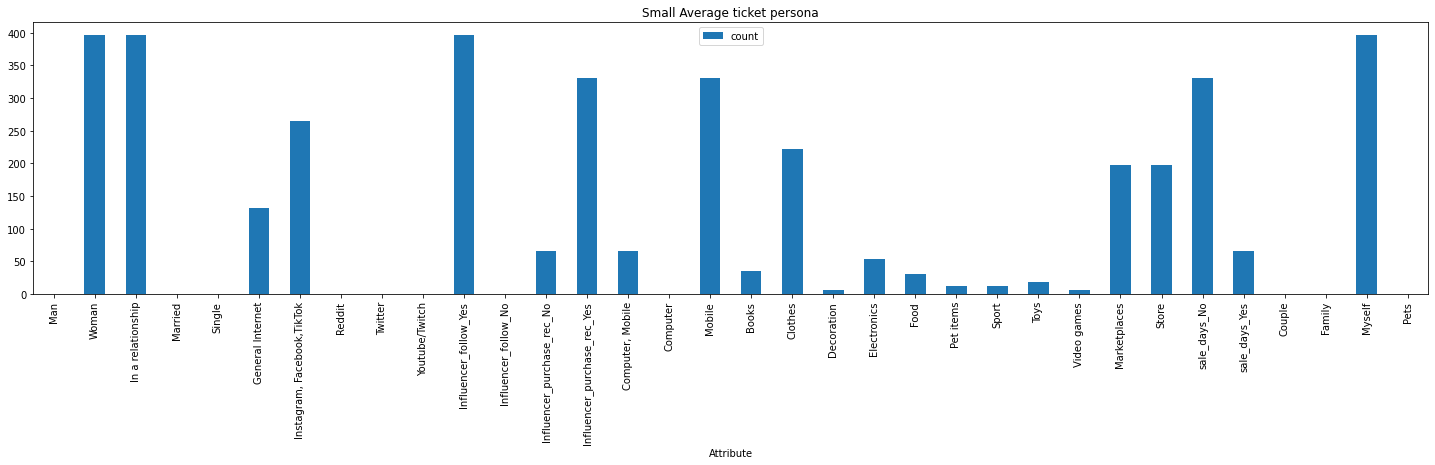

In [104]:
plt.rcParams["figure.figsize"] = (25,5)

ax = sum_df.plot(x="Attribute", y="count", kind="bar", rot=90)

ax.set_title('Small Average ticket persona')

plt.show()

In [ ]:
mean_df = pd.DataFrame(mean.items())
mean_df = mean_df.rename(columns={0: 'Attribute', 1: 'mean'})

mean_df

,Attribute,mean
0,Children,0.00
1,Purchase_frequency_year,48.00
2,Annual_Gross_Salary_mean,40000.00
3,Internet_hours_mean,6.50
4,Age_mean,26.50
5,Monthly_expense_mean,225.00
6,Online_Influenced_purchase_mean,33.00
7,Average_ticket,56.25


##Buyer Persona Profile nº3

Women

Age: +35

Salary: >18.000 €/y

Not Single

Children: +1

Buying target: Her self

In [147]:
buyer_persona3 = data_dummies
buyer_persona3 = buyer_persona3[buyer_persona3['Woman']==1]
buyer_persona3 = buyer_persona3[buyer_persona3['Children']>0]
buyer_persona3 = buyer_persona3[buyer_persona3['Single']==0]
buyer_persona3 = buyer_persona3[buyer_persona3['Age_mean']>35]
buyer_persona3 = buyer_persona3[buyer_persona3['Myself']==1]

buyer_persona3

,Children,Purchase_frequency_year,Annual_Gross_Salary_mean,Internet_hours_mean,Age_mean,Monthly_expense_mean,Online_Influenced_purchase_mean,Average_ticket,Man,Woman,In a relationship,Married,Single,General Internet,"Instagram, Facebook,TikTok",Other,Reddit,Twitter,Youtube/Twitch,Influencer_follow_No,Influencer_follow_Yes,Influencer_purchase_rec_No,Influencer_purchase_rec_Yes,Computer,"Computer, Mobile","Computer, Mobile, Tablet",Mobile,"Mobile, Tablet",Tablet,Books,Clothes,Decoration,Electronics,Food,Pet items,Sport,Toys,Video games,Marketplaces,Store,sale_days_No,sale_days_Yes,Couple,Family,Myself,Pets
3102,2,48,40000,2.0,42.5,300,33.0,75.0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
3103,2,48,40000,2.0,42.5,300,33.0,75.0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
3104,2,48,40000,2.0,42.5,300,33.0,75.0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
3105,2,48,40000,2.0,42.5,300,33.0,75.0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0
3106,2,48,40000,2.0,42.5,300,33.0,75.0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219,1,6,40000,4.0,42.5,300,33.0,600.0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0
4220,1,6,40000,4.0,42.5,300,33.0,600.0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
4221,1,6,40000,4.0,42.5,300,33.0,600.0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
4222,1,6,40000,4.0,42.5,300,33.0,600.0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0


In [ ]:
buyer_persona3 = data_dummies
buyer_persona3 = buyer_persona3[buyer_persona3['Woman']==1]
buyer_persona3 = buyer_persona3[buyer_persona3['Children']>0]
buyer_persona3 = buyer_persona3[buyer_persona3['Single']==0]
buyer_persona3 = buyer_persona3[buyer_persona3['Age_mean']>35]
buyer_persona3 = buyer_persona3[buyer_persona3['Myself']==1]

buyer_persona3

In [148]:
sum = {}
mean = {}
column_list = ['Man','Woman','In a relationship','Married','Single','General Internet','Instagram, Facebook,TikTok','Reddit','Twitter','Youtube/Twitch','Influencer_follow_Yes','Influencer_follow_No','Influencer_purchase_rec_No','Influencer_purchase_rec_Yes','Computer, Mobile','Computer','Mobile','Mobile','Books','Clothes','Decoration','Electronics','Food','Pet items','Sport','Toys','Video games','Marketplaces','Store','sale_days_No','sale_days_Yes','Couple','Family','Myself','Pets']
column_list_2 = ['Children','Purchase_frequency_year','Annual_Gross_Salary_mean','Internet_hours_mean','Age_mean','Monthly_expense_mean','Online_Influenced_purchase_mean','Average_ticket']
for column in column_list:
    a= buyer_persona3[column].sum()
    sum[column] = a

for column in column_list_2:
    a= buyer_persona3[column].mean()
    mean[column] = a


In [149]:
sum_df = pd.DataFrame(sum.items())
sum_df = sum_df.rename(columns={0: 'Attribute', 1: 'count'})

sum_df

,Attribute,count
0,Man,0
1,Woman,264
2,In a relationship,132
3,Married,132
4,Single,0
5,General Internet,66
6,"Instagram, Facebook,TikTok",198
7,Reddit,0
8,Twitter,0
9,Youtube/Twitch,0


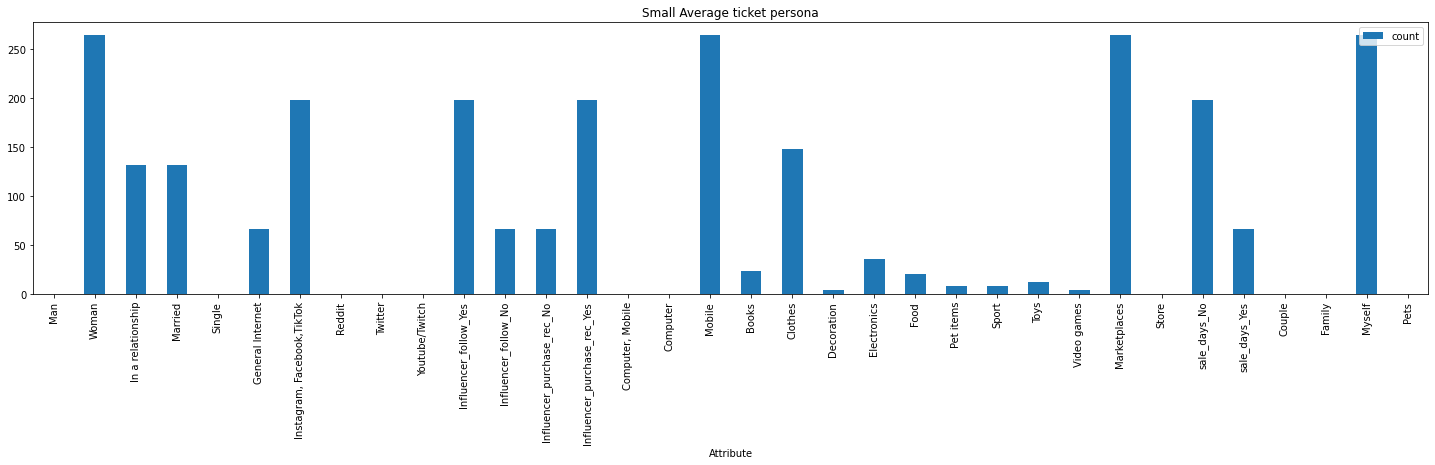

In [150]:
plt.rcParams["figure.figsize"] = (25,5)

ax = sum_df.plot(x="Attribute", y="count", kind="bar", rot=90)

ax.set_title('Small Average ticket persona')

plt.show()

In [151]:
mean_df = pd.DataFrame(mean.items())
mean_df = mean_df.rename(columns={0: 'Attribute', 1: 'mean'})

mean_df

,Attribute,mean
0,Children,1.500
1,Purchase_frequency_year,15.000
2,Annual_Gross_Salary_mean,28250.000
3,Internet_hours_mean,3.250
4,Age_mean,44.375
5,Monthly_expense_mean,200.000
6,Online_Influenced_purchase_mean,41.500
7,Average_ticket,393.750


##Sale days behaviour Woman
After working on the buyer persona profiles I realise that there is an extreme relation about Sales days and salaries.

In [117]:
Sales_days_woman_yes = data[(data['Gender']=='Woman') & (data['More_buying_promoted_sale_days']=='Yes')]
Sales_days_woman_no = data[(data['Gender']=='Woman') & (data['More_buying_promoted_sale_days']=='No')]

print('Average salary of woman who buy MORE on sales days is:' + str(Sales_days_woman_yes['Annual_Gross_Salary_mean'].mean())+' | Sample size: '+ str(len(Sales_days_woman_yes.index)))
print('Average salary of woman who buy LESS on sales days is:' + str(Sales_days_woman_no['Annual_Gross_Salary_mean'].mean())+' | Sample size: '+ str(len(Sales_days_woman_no.index)))


Average salary of woman who buy MORE on sales days is:23153.846153846152 | Sample size: 13
Average salary of woman who buy LESS on sales days is:19757.575757575756 | Sample size: 33
13
33


## Statistical hypothesis testing

###Hypothesis nº4

Let's see if we can demostrate the hypothesys of what we have seen above

H0: Avg salary of woman who buy MORE on sales <= Avg salary of woman who buy LESS on sales

H1: Avg salary of woman who buy MORE on sales > Avg salary of woman who buy LESS on sales

*H0: \mu_woman_sales <= \mu_woman_no_sales*

*H1: \mu_woman_sales > \mu_woman_no_sales*

*\alpha = 5%*

In [138]:
woman_sales = Sales_days_woman_yes['Annual_Gross_Salary_mean']
woman_sales

11    24000
16     9000
19    40000
20     9000
26     9000
28    40000
37    24000
42    40000
63    40000
65     9000
70     9000
73    24000
78    24000
Name: Annual_Gross_Salary_mean, dtype: int64

In [119]:
woman_no_sales = Sales_days_woman_no['Annual_Gross_Salary_mean']
woman_no_sales

1     24000
2      9000
6     50000
7     24000
12    40000
13     9000
14     9000
17     9000
23    24000
24     9000
27     9000
29    24000
30     9000
31    24000
32    40000
34     9000
35    24000
36     9000
44    24000
46    24000
47    40000
53     9000
55    24000
57     9000
59     9000
62    24000
64    24000
67     9000
68     9000
69     9000
74     9000
75    24000
77    50000
Name: Annual_Gross_Salary_mean, dtype: int64

In [122]:
st.ttest_ind(woman_sales, woman_no_sales, equal_var = False, alternative = 'greater')

Ttest_indResult(statistic=0.7881229322330451, pvalue=0.21971349846341665)

As the pvalue is more than the significance level (5%), we cannot reject the null hypothesis.


### Scatter plot - Hypothesis nº4

In [143]:
woman_sales_df = woman_sales.to_frame()
woman_sales_freq = pd.value_counts(woman_sales_df.Annual_Gross_Salary_mean)
woman_sales_freq_1 = woman_sales_freq.to_frame()
woman_sales_freq_1.reset_index(inplace=True)
woman_sales_freq_1 = woman_sales_freq_1.rename(columns={'index': 'Salary', 'Annual_Gross_Salary_mean': 'count'})

woman_sales_freq_1

,Salary,count
0,9000,5
1,24000,4
2,40000,4


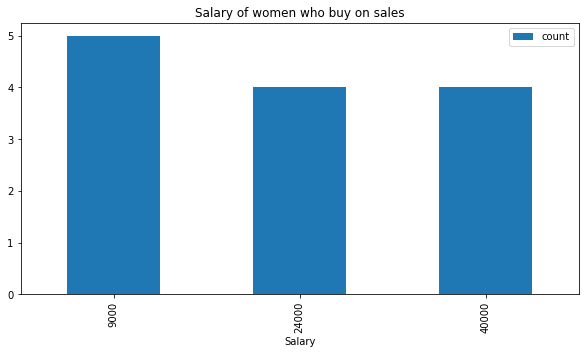

In [144]:
plt.rcParams["figure.figsize"] = (10,5)

ax = woman_sales_freq_1.plot(x="Salary", y="count", kind="bar", rot=90)

ax.set_title('Salary of women who buy on sales')

plt.show()

In [145]:
woman_no_sales_df = woman_no_sales.to_frame()
woman_no_sales_freq = pd.value_counts(woman_no_sales_df.Annual_Gross_Salary_mean)
woman_no_sales_freq_1 = woman_no_sales_freq.to_frame()
woman_no_sales_freq_1.reset_index(inplace=True)
woman_no_sales_freq_1 = woman_no_sales_freq_1.rename(columns={'index': 'Salary', 'Annual_Gross_Salary_mean': 'count'})

woman_no_sales_freq_1

,Salary,count
0,9000,16
1,24000,12
2,40000,3
3,50000,2


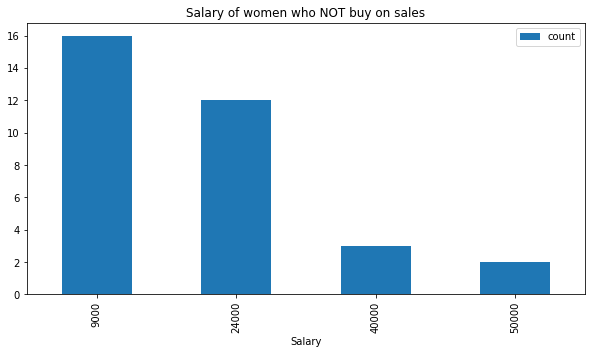

In [146]:
plt.rcParams["figure.figsize"] = (10,5)

ax = woman_no_sales_freq_1.plot(x="Salary", y="count", kind="bar", rot=90)

ax.set_title('Salary of women who NOT buy on sales')

plt.show()